# Alzheimer's Prediction
---
### **Table of Contents**

   #### 1. Introduction
   #### 2. About the Dataset
   #### 3. Exploratory Data Analysis (EDA)
   #### 4. Building Prediction Models
   #### 5. Results 
   #### 6. Acknowledgements


# 1. Introduction

**Motivation**: 

Experiment and apply machine learning in Neuroimaging context, specifically predicting Alzheimer's disease (AD).

**Background:**

Alzheimer's disease (AD) is a progressive neurodegenerative disorder characterized by cognitive decline, memory loss, and changes in behavior. It is the most common cause of dementia, affecting millions of individuals worldwide, predominantly among the elderly population. The disease gradually impairs memory, thinking, and the ability to carry out daily activities, severely impacting the quality of life of both patients and their caregivers.[1]

**Problem Statement:**

Despite the widespread impact of Alzheimer's disease, early detection remains a significant challenge. Leveraging advancements in neuroimaging and machine learning presents an opportunity to address this challenge. This study aims to harness neuroimaging data, particularly MRI scans, in conjunction with clinical information, to construct predictive models capable of identifying individuals at risk of developing Alzheimer's disease.

Successful development of predictive models could revolutionize early detection strategies for Alzheimer's disease, potentially enabling timely interventions and personalized care. Ultimately, this could lead to improved patient outcomes and pave the way for proactive management of neurodegenerative disorders.

# 2. About the Dataset

## Dataset Background 
The dataset used in this notebook is the Open Access Series of Imaging Studies (OASIS) [2] from this [Kaggle dataset](http://www.kaggle.com/datasets/jboysen/mri-and-alzheimers), the dataset information is as follows: 

"Longitudinal MRI Data in Nondemented and Demented Older Adults: 
- This set consists of a longitudinal collection of 150 subjects aged 60 to 96. 
- Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. 
- For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. 
- The subjects are all right-handed and include both men and women. 
- 72 of the subjects were characterized as nondemented throughout the study. 
- 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. 
- Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit."

## Column Descriptions

1. **EDUC (Years of education):** Represents the number of years of formal education an individual has completed.

2. **SES (Socioeconomic Status):** Refers to an individual's social and economic position within society, often encompassing factors like income, education, and occupation.

3. **MMSE (Mini Mental State Examination):** A brief cognitive test used to assess an individual's cognitive function, including aspects like memory, attention, and language.

4. **CDR (Clinical Dementia Rating):** A scale used to assess the severity of dementia, providing ratings based on cognitive and functional abilities, often used in diagnosing and staging dementia.

5. **eTIV (Estimated Total Intracranial Volume):** An estimation of the total volume inside the skull, including brain tissues and cerebrospinal fluid, measured from neuroimaging data.

6. **nWBV (Normalized Whole Brain Volume):** Represents the brain's volume adjusted or normalized to the individual's head size or total intracranial volume, aiding in comparisons across individuals.

7. **ASF (Atlas Scaling Factor):** A scaling factor used in neuroimaging to transform brain images from their original acquisition resolution to a standardized reference space or atlas, ensuring comparability across subjects.

# 3. Exploratory Data Analysis (EDA)

**This section will involve several actions to understand, preprocess, and visualize this dataset.**

In [74]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/mri-and-alzheimers/oasis_longitudinal.csv'  
data = pd.read_csv(file_path)

In [75]:
print("\nFirst few rows of dataset:")

print(f"{data.head().to_string(index=False)}")


First few rows of dataset:
Subject ID        MRI ID       Group  Visit  MR Delay M/F Hand  Age  EDUC  SES  MMSE  CDR  eTIV  nWBV   ASF
 OAS2_0001 OAS2_0001_MR1 Nondemented      1         0   M    R   87    14  2.0  27.0  0.0  1987 0.696 0.883
 OAS2_0001 OAS2_0001_MR2 Nondemented      2       457   M    R   88    14  2.0  30.0  0.0  2004 0.681 0.876
 OAS2_0002 OAS2_0002_MR1    Demented      1         0   M    R   75    12  NaN  23.0  0.5  1678 0.736 1.046
 OAS2_0002 OAS2_0002_MR2    Demented      2       560   M    R   76    12  NaN  28.0  0.5  1738 0.713 1.010
 OAS2_0002 OAS2_0002_MR3    Demented      3      1895   M    R   80    12  NaN  22.0  0.5  1698 0.701 1.034


In [76]:
# Dropping irrelevant rows and encode Group 
data = data.loc[data['Visit']==1] # using initial visit only
data = data.reset_index(drop=True) # reset index after dropping non-initial visits
data['M/F'] = data['M/F'].replace(['F','M'], [0,1]) 
data['Group'] = data['Group'].replace(['Converted'], ['Demented']) # Converted is treated as Demented
data['Group'] = data['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Encode with binary value

In [77]:
# drop unneccesary columns
columns_to_drop = ['Subject ID', 'MRI ID', 'Hand', 'Visit', 'MR Delay']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [78]:
print("\nSummary statistics for longitudinal data:")
print(f"{data.describe().transpose().to_string(float_format='{:,.2f}'.format)}")


Summary statistics for longitudinal data:
       count     mean    std      min      25%      50%      75%      max
Group 150.00     0.52   0.50     0.00     0.00     1.00     1.00     1.00
M/F   150.00     0.41   0.49     0.00     0.00     0.00     1.00     1.00
Age   150.00    75.45   7.55    60.00    70.00    75.00    80.00    96.00
EDUC  150.00    14.53   2.87     6.00    12.00    14.00    16.00    23.00
SES   142.00     2.49   1.13     1.00     2.00     2.00     3.00     5.00
MMSE  150.00    27.56   2.97    17.00    26.00    29.00    30.00    30.00
CDR   150.00     0.26   0.33     0.00     0.00     0.00     0.50     1.00
eTIV  150.00 1,474.43 174.68 1,123.00 1,347.25 1,453.50 1,565.25 1,987.00
nWBV  150.00     0.74   0.04     0.66     0.71     0.73     0.76     0.84
ASF   150.00     1.21   0.14     0.88     1.12     1.21     1.30     1.56


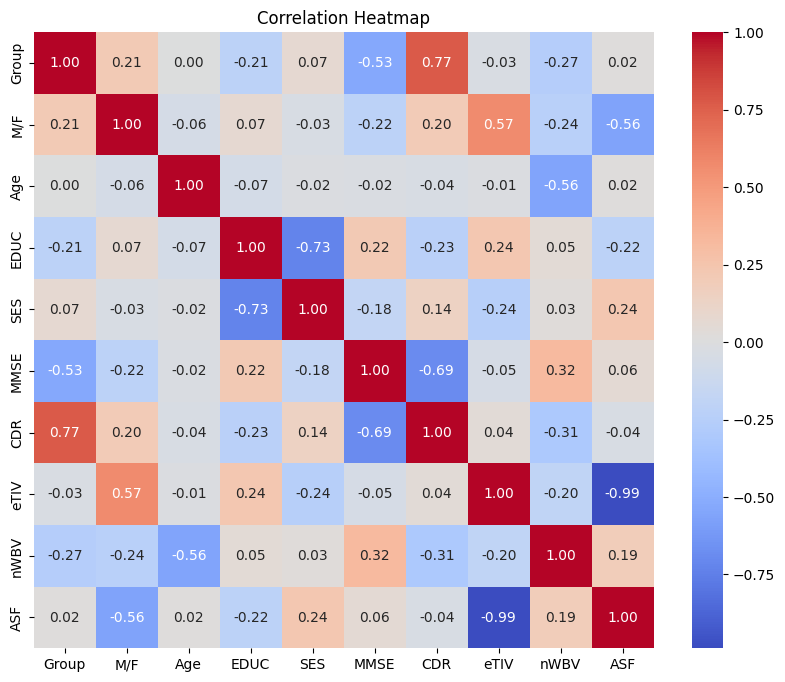

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Based on above correlation heatmap, few observations can be made:**
- Age has no association with Group in this dataset.
- SES and ASF has near 0 association with Group.
- eTIV has a near 0 association with Group. nWBV (derived by normalizing eTIV concerning the brain's size) presents a stronger relevance to Group.
- MMSE has the highest association with Group after CDR.

**Therefore, we speculate that MMSE would be the most important feature in predicting Alzheimer's (besides CDR).**

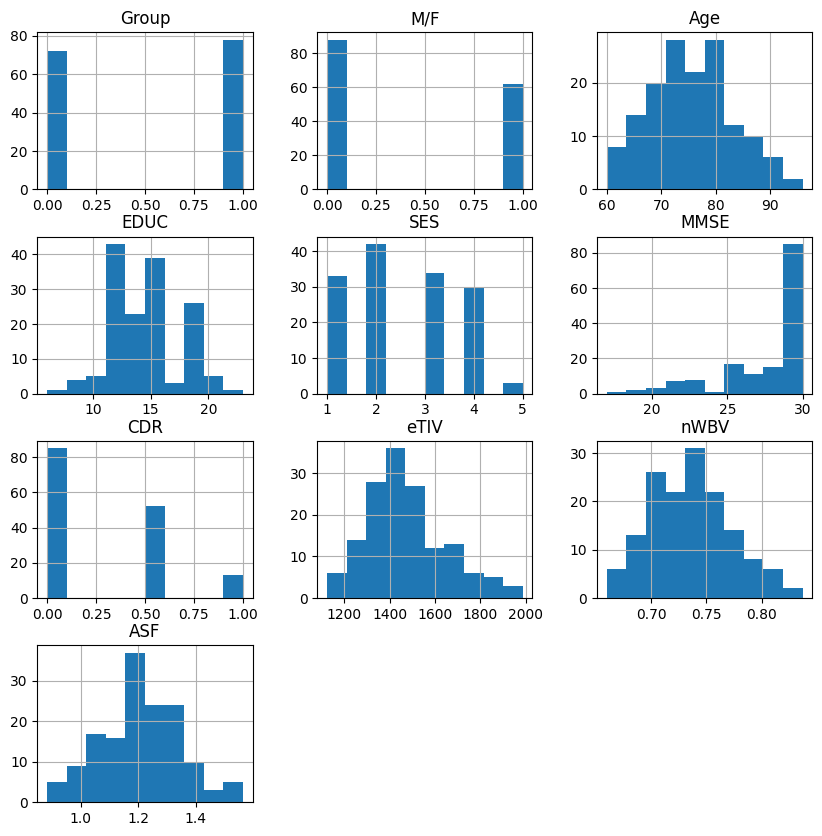

In [81]:
data.hist(figsize=(10, 10))
plt.show()

#### Based on above histograms,few observations are made:
1. Distribution of target variable Group is well balanced.
2. Distribution of MMSE is skewed.

In [82]:
# Checking for outliers in MMSE
from scipy import stats

z_scores = stats.zscore(data['MMSE'])
threshold = 3  
mmse_outliers = data[abs(z_scores) > threshold]
print(mmse_outliers)

    Group  M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
91      1    1   62    12  4.0  17.0  0.5  1525  0.732  1.151


**Based on above outliers checking, MMSE has one outlier.**

### Handle Missing Values

In [83]:
print("\nMissing values in data:")
print(f"{data.isnull().sum().to_string()}")


Missing values in data:
Group    0
M/F      0
Age      0
EDUC     0
SES      8
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0


**SES has 8 rows with missing values. Due to the size of this dataset, we will be performing imputing (replacing missing values with values such as mean or median). In our case, we will replace the missing values with median as it is less sensitive to presence of outliers.**

In [84]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the DataFrame (X)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [85]:
# Verify missing values 
print("\nNo more missing values in data:")
print(f"{data_imputed.isnull().sum().to_string()}")


No more missing values in data:
Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0


#### Split Data into Training and Testing Sets

In [86]:
from sklearn.model_selection import train_test_split

y = data_imputed['Group'] # Group is our target variable
X = data_imputed.drop(['Group', 'CDR'], axis=1) # Remove ground-truth label and Clinical Dementia Rating (a measure of dementia severity) from our features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 4. Building Prediction Models

### Performance Evaluation Metrics:
 
We will use the following performance evaluation metrics: 

- **Accuracy**: Suitable for balanced datasets where true positives and true negatives are equally important. 
- **Precision** (False Positives/False Positives + True Positives): Helpful when the cost of false positives is high. *In detecting early Alzheimer's, it is important that patients are not misdiagnosed and placed on potentially detrimental medications.*

- **Recall** (True Positives/True Positives + False Negatives): Useful when the cost of false negatives is high. *In our case, it is crucial that we identify Alzheimer's early on to begin symptomatic treatment.*

- **F1 Score**: Harmonic mean of precision and recall.

### Model 1: Logistic Regression

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Define the parameter grid to search through
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithm
    'max_iter': [100, 500, 1000]  # Maximum number of iterations
}

# Standardizing features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_model = LogisticRegression()
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy') # Initialize GridSearchCV
grid_search.fit(X_train_scaled, y_train) # Fit the grid search to the data

best_params = grid_search.best_params_ # Get the best parameters found by GridSearchCV
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_ # Use the best model found by GridSearchCV
predictions = best_model.predict(X_test_scaled) # Make predictions on the test set using the best model

# Evaluating the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, predictions, output_dict=True)
print("Classification Report:")
print(report)

results = []

# Store results in a dictionary
result_dict = {
    'Model': 'Logistic Regression',
    'Best Parameters': best_params,
    'Accuracy': accuracy,
    'Classification Report': report
}

# Append dictionary to the results list
results.append(result_dict)

Best Parameters: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
Accuracy: 0.79
Classification Report:
{'0.0': {'precision': 0.75, 'recall': 0.8333333333333334, 'f1-score': 0.7894736842105262, 'support': 18}, '1.0': {'precision': 0.8333333333333334, 'recall': 0.75, 'f1-score': 0.7894736842105262, 'support': 20}, 'accuracy': 0.7894736842105263, 'macro avg': {'precision': 0.7916666666666667, 'recall': 0.7916666666666667, 'f1-score': 0.7894736842105262, 'support': 38}, 'weighted avg': {'precision': 0.793859649122807, 'recall': 0.7894736842105263, 'f1-score': 0.7894736842105262, 'support': 38}}


### Model 2: Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10, 15],  
    'min_samples_leaf': [1, 2, 4, 6]  
}

decision_tree = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, predictions, output_dict=True)
print("Classification Report:")
print(report)

result_dict = {
    'Model': 'Decision Tree',
    'Best Parameters': best_params,
    'Accuracy': accuracy,
    'Classification Report': report
}

results.append(result_dict)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}
Accuracy: 0.79
Classification Report:
{'0.0': {'precision': 0.7083333333333334, 'recall': 0.9444444444444444, 'f1-score': 0.8095238095238096, 'support': 18}, '1.0': {'precision': 0.9285714285714286, 'recall': 0.65, 'f1-score': 0.7647058823529412, 'support': 20}, 'accuracy': 0.7894736842105263, 'macro avg': {'precision': 0.8184523809523809, 'recall': 0.7972222222222223, 'f1-score': 0.7871148459383754, 'support': 38}, 'weighted avg': {'precision': 0.8242481203007519, 'recall': 0.7894736842105263, 'f1-score': 0.7859354268022999, 'support': 38}}


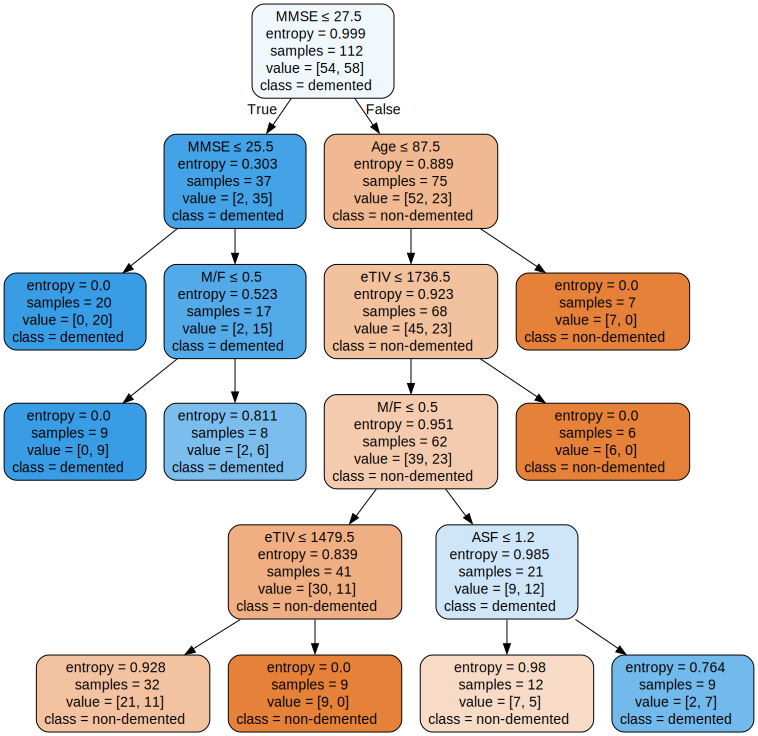

In [89]:
# Visualizing the decision tree
from sklearn.tree import export_graphviz
import graphviz

tree_graph = export_graphviz(
    best_model,
    out_file=None,
    feature_names=X.columns,  
    class_names=['non-demented', 'demented'],  
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(tree_graph)
graph.render('decision_tree_graph', format='png')  
graph

* **As expected, MMSE is the most important (most pure) feature in the decision tree model.**

* **Surprisingly, nWBV (correlation of 0.27 with Group) is not of the decision nodes. On the other hand, eTIV forms the decision nodes. This comes as a surprising observation considering the lower correlation with Group than nWBV shown in the correlation heatmap.**

### Model 3: Support Vector Machine 

In [90]:
from sklearn.svm import SVC

# Standardizing features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  
    'kernel': ['rbf', 'linear', 'poly']  
}

svm = SVC(random_state=0)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, predictions, output_dict=True)
print("Classification Report:")
print(report)

result_dict = {
    'Model': 'Support Vector Machine',
    'Best Parameters': best_params,
    'Accuracy': accuracy,
    'Classification Report': report
}

results.append(result_dict)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.84
Classification Report:
{'0.0': {'precision': 0.75, 'recall': 1.0, 'f1-score': 0.8571428571428571, 'support': 18}, '1.0': {'precision': 1.0, 'recall': 0.7, 'f1-score': 0.8235294117647058, 'support': 20}, 'accuracy': 0.8421052631578947, 'macro avg': {'precision': 0.875, 'recall': 0.85, 'f1-score': 0.8403361344537814, 'support': 38}, 'weighted avg': {'precision': 0.881578947368421, 'recall': 0.8421052631578947, 'f1-score': 0.8394515701017248, 'support': 38}}


In [91]:
# Displaying feature importance in SVM
# Get the coefficients
coefficients = best_model.coef_
feature_importance = pd.Series(coefficients[0], index=X.columns)

print(feature_importance)

M/F     0.626074
Age    -0.008140
EDUC   -0.535542
SES    -0.533035
MMSE   -1.525822
eTIV   -0.910120
nWBV   -0.213315
ASF    -0.291523
dtype: float64


**Based on the feature importance of the linear SVM, these observations are made:**

- M/F (Gender): It appears to have a positive influence (0.626074), implying that in the model's decision-making process, gender has a relatively stronger positive impact.

- Age: The negative value (-0.008140) might suggest that age doesn't play a significant role or has a negligible impact on the model's predictions.

- EDUC (Education): This feature seems to have a negative influence (-0.535542), indicating that in this model, higher education might be associated with lower predictions.

- SES (Socioeconomic Status): Similar to education, it has a negative impact (-0.533035), suggesting that higher SES might not be strongly associated with the target variable.

- MMSE (Mini-Mental State Examination): This feature has the **most substantial negative impact** (-1.525822), indicating that lower MMSE scores strongly influence the predictions made by the model.

- eTIV (Estimated Total Intracranial Volume): In accordance with decision tree, **eTIV has substanially significant negative influence on prediction compared to nWBV.**

- nWBV (Normalized Whole Brain Volume): This feature seems to have a negative influence (-0.213315), but is weaker than MMSE.

- ASF (Atlas Scaling Factor): This feature seems to have a negative influence (-0.291523), but is weaker than MMSE.

### Model 4: Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at a leaf node
}

random_forest = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, predictions, output_dict=True)
print("Classification Report:")
print(report)

result_dict = {
    'Model': 'Random Forest',
    'Best Parameters': best_params,
    'Accuracy': accuracy,
    'Classification Report': report
}

results.append(result_dict)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.79
Classification Report:
{'0.0': {'precision': 0.7083333333333334, 'recall': 0.9444444444444444, 'f1-score': 0.8095238095238096, 'support': 18}, '1.0': {'precision': 0.9285714285714286, 'recall': 0.65, 'f1-score': 0.7647058823529412, 'support': 20}, 'accuracy': 0.7894736842105263, 'macro avg': {'precision': 0.8184523809523809, 'recall': 0.7972222222222223, 'f1-score': 0.7871148459383754, 'support': 38}, 'weighted avg': {'precision': 0.8242481203007519, 'recall': 0.7894736842105263, 'f1-score': 0.7859354268022999, 'support': 38}}


### Model 5: Gradient Boosting Classifier

In [93]:
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

xgb_classifier = XGBClassifier(random_state=0)
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {accuracy:.2f}")

report = classification_report(y_test, predictions, output_dict=True)
print("Classification Report:")
print(report)

result_dict = {
    'Model': 'Gradient Boosting Classifier',
    'Best Parameters': best_params,
    'Accuracy': accuracy,
    'Classification Report': report
}

results.append(result_dict)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
Accuracy Score: 0.76
Classification Report:
{'0.0': {'precision': 0.6956521739130435, 'recall': 0.8888888888888888, 'f1-score': 0.7804878048780488, 'support': 18}, '1.0': {'precision': 0.8666666666666667, 'recall': 0.65, 'f1-score': 0.7428571428571429, 'support': 20}, 'accuracy': 0.7631578947368421, 'macro avg': {'precision': 0.7811594202898551, 'recall': 0.7694444444444444, 'f1-score': 0.7616724738675958, 'support': 38}, 'weighted avg': {'precision': 0.7856598016781083, 'recall': 0.7631578947368421, 'f1-score': 0.7606821932880984, 'support': 38}}


### Models Evaluation

In [94]:
results_data = []

# Loop through the results list and populate the data list
for result in results:
    model_name = result['Model']
    accuracy = result['Accuracy']
    
    # Access classification report dictionary directly
    classification_metrics = result['Classification Report']
    
    # Extract precision, recall, and F1-score from the classification report
    precision = classification_metrics['1.0']['precision']
    recall = classification_metrics['1.0']['recall']
    f1_score = classification_metrics['1.0']['f1-score']
    
    # Append the model results to the data list
    results_data.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    })

# Create a DataFrame from the collected data
results_df = pd.DataFrame(results_data)

# Display the DataFrame
print(results_df)


                          Model  Accuracy  Precision  Recall  F1 Score
0           Logistic Regression  0.789474   0.833333    0.75  0.789474
1                 Decision Tree  0.789474   0.928571    0.65  0.764706
2        Support Vector Machine  0.842105   1.000000    0.70  0.823529
3                 Random Forest  0.789474   0.928571    0.65  0.764706
4  Gradient Boosting Classifier  0.763158   0.866667    0.65  0.742857


# 5. Results:

- **Accuracy**: The Support Vector Machine (SVM) achieved the highest accuracy at 0.84, while the Gradient Boosting Classifier had the lowest at 0.76.

- **Precision**: SVM and Decision Tree have the highest precision, indicating that when they predict a positive case, they are correct about 83% to 100% of the time.

- **Recall**: SVM and Random Forest have the highest recall, capturing about 70% to 75% of true positive instances.

- **F1 Score**: SVM leads with the highest F1 Score of 0.82.

Interpreting these results, the SVM model generally exhibits better performance across accuracy, precision, recall, and F1 Score compared to other models. However, Decision Tree and Random Forest have similar precision and recall but slightly lower accuracy and F1 Score. The Gradient Boosting Classifier, while achieving a decent accuracy, has slightly lower precision, recall, and F1 Score compared to other models.

### Interpretation:
* **The most significant feature found is MMSE, which is associated with a notably strong impact on predicting Alzheimer's Disease progression or diagnosis.** 

* **The second most influential factor observed in SVM model in predicting Alzheimer's Disease is eTIV, which aligns with current research consensus that brain volume and structural measures play a crucial role in understanding and diagnosing neurodegenerative conditions like Alzheimer's. [3]**

# 6. Acknowledgements

## References

1. U.S. Department of Health and Human Services. (n.d.). Alzheimer’s disease fact sheet. National Institute on Aging. https://www.nia.nih.gov/health/alzheimers-and-dementia/alzheimers-disease-fact-sheet 
2. OASIS-2: Longitudinal: https://doi.org/10.1162/jocn.2009.21407
3. Erten-Lyons, D., Dodge, H. H., Woltjer, R., Silbert, L. C., Howieson, D. B., Kramer, P., & Kaye, J. A. (2013). Neuropathologic basis of age-associated brain atrophy. JAMA neurology, 70(5), 616–622. https://doi.org/10.1001/jamaneurol.2013.1957